In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

[PosixPath('bike_share/precision_bike_share.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_BIKE_SHARE


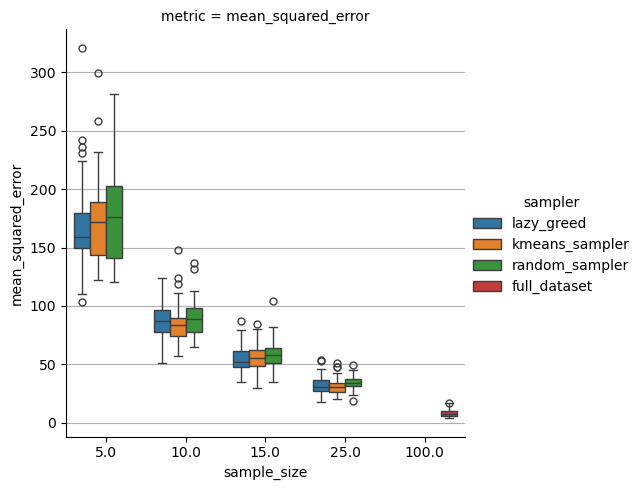

In [2]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[0].stem.upper()}')


result = pd.read_csv(files[0])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# plt.title(f'{files[1].stem.upper()} dataset', fontsize=10)
plt.ylabel(result.metric.unique()[0])
plt.grid(axis='y')
# plt.yscale('log')
# plt.tight_layout()
plt.show()

[PosixPath('bike_share/precision_bike_share.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_NURSERY


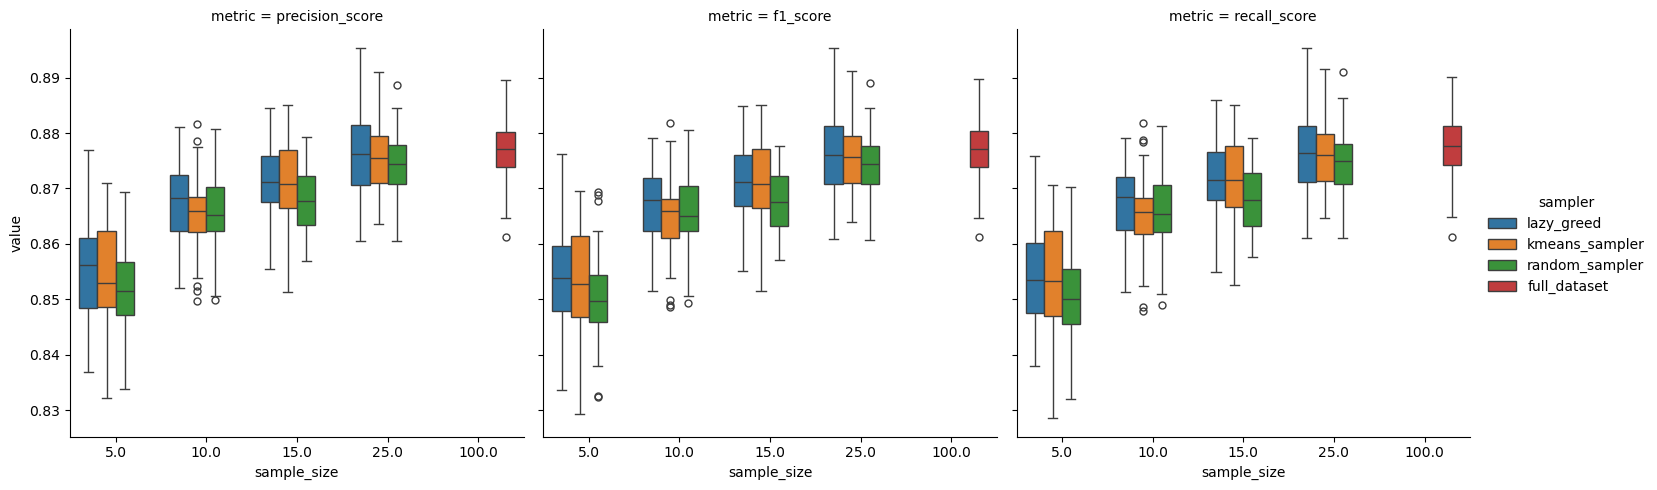

In [7]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[1].stem.upper()}')


result = pd.read_csv(files[1])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size > 4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
# plt.title(f'{files[1].stem.upper()} dataset', fontsize=10)
plt.ylabel(result.metric.unique()[0])
# plt.tight_layout()
plt.show()

[PosixPath('bike_share/precision_bike_share.csv'), PosixPath('nursery/precision_nursery.csv'), PosixPath('adult/precision_adult.csv')]
PRECISION_ADULT


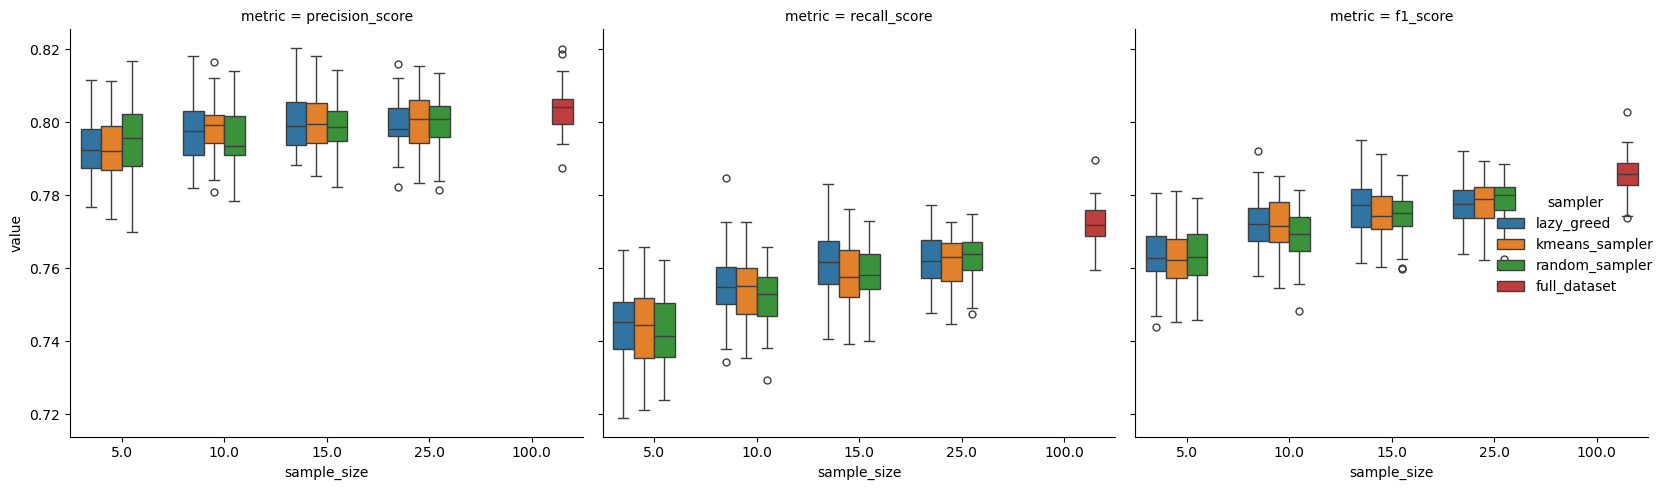

In [9]:
curdir = Path()
files = [*curdir.rglob('precision*.csv')]

print(files)

print(f'{files[2].stem.upper()}')


result = pd.read_csv(files[2])
result['sample_size'] = (result['sample_size'] / result['train_size']).round(2) * 100
sns.catplot(data=result[result.sample_size>4], x='sample_size', y='value', hue='sampler', kind='box', col='metric')
plt.ylabel(result.metric.unique()[0])
plt.tight_layout()
plt.show()

[PosixPath('bike_share/curve_bike_share.csv'), PosixPath('nursery/curve_nursery.csv'), PosixPath('adult/curve_adult.csv'), PosixPath('nursery/.ipynb_checkpoints/curve_nursery-checkpoint.csv'), PosixPath('adult/.ipynb_checkpoints/curve_adult-checkpoint.csv')]
CURVE_BIKE_SHARE


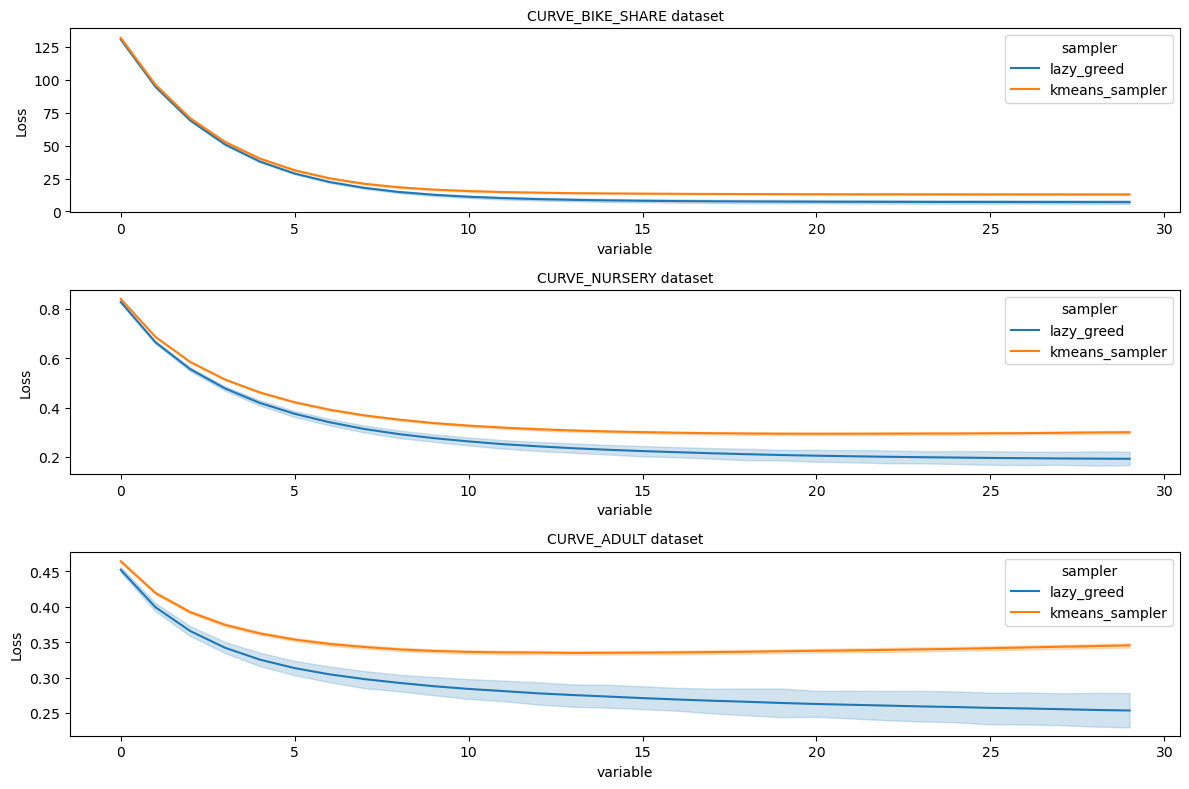

In [12]:
curdir = Path()
files = [*curdir.rglob('curve*.csv')]

print(files)

print(f'{files[0].stem.upper()}')

names = [
    'sampler', 
    'train/test', 
    'sample_size', 
    'size'
]

fig, axes = plt.subplots(3, 1, figsize=(12,8))

for file, ax in zip(files, axes):
    result = pd.read_csv(file)
    rows, cols = result.shape
    result.columns = [
        *names, 
        *range(cols - len(names))
    ] 
    
    result = result[
        (result['train/test'] == 'test') &
        # (result['sampler'] == 'random_sampler') |
        # (result['sampler'] == 'full_dataset') |
        (result['sampler'] == 'kmeans_sampler') |
        (result['sampler'] == 'lazy_greed')
    ]
    
    result = result.melt(names)
    result.variable = result.variable.astype(float)
    sns.lineplot(data=result, x='variable', y='value', hue='sampler', ax=ax)
    ax.set_title(f'{file.stem.upper()} dataset', fontsize=10)
    ax.set_ylabel('Loss')
    # ax.set_yscale('log')

    plt.tight_layout()
plt.show()

In [6]:
result.sample_size.unique()

array([26048,  1302])